In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('laptop_price.csv',encoding='unicode_escape')

In [4]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 132.5+ KB


In [6]:
data.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [7]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data = data.drop(columns=['Product'])

In [ ]:
data['TypeName'].value_counts()
data['TypeName'] = data['TypeName'].str.replace('Netbook','Notebook')

data['TypeName'].value_counts()

TypeName
Notebook              752
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Name: count, dtype: int64

In [14]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [15]:
data['ScreenResolution'] = data['ScreenResolution'].str.split(' ').str[-1]

In [16]:
data['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [17]:
data['Screen Height'] = data['ScreenResolution'].apply(lambda x:x.split('x')[0]).astype(int)  # make new column screen height
data['Screen Height']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: Screen Height, Length: 1303, dtype: int32

In [18]:
data['Screen width'] = data['ScreenResolution'].apply(lambda x:x.split('x')[1]).astype(int)  # makeing new column screen width
data['Screen width']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Screen width, Length: 1303, dtype: int32

In [19]:
data = data.drop('ScreenResolution',axis=1)

In [20]:
data.head()

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Screen Height,Screen width
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,2880,1800
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,2560,1600


In [25]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [26]:
data['Cpu Brand'] = data['Cpu'].str.split(' ').str[0]  # make new column cpu rand

In [28]:
data['Cpu Brand'].value_counts()

Cpu Brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [ ]:
# remove samsung row beacause it's count was 1
data = data.drop(data[data['Cpu Brand']=='Samsung'].index)  

In [ ]:
# make new column cpu Ghz
data['Cpu HZ'] = data['Cpu'].str.split(' ').str[-1]   

In [ ]:
# removing string 'Ghz' from string
data['Cpu HZ'] = data['Cpu HZ'].apply(lambda x: x[:-3]).astype(float)  
data['Cpu HZ']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu HZ, Length: 1302, dtype: float64

In [32]:
data = data.drop(columns=['Cpu']) # drop cpu column

In [33]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [34]:
def dd(x):
    y = ['.0','GB','SSD','HDD','Flash Storage','Hybrid']
    for i in range(len(y)):
        x = x.replace(y[i],'')
    x = x.replace('TB','000')
    x = x.split('+')
    if len(x) == 2:
        x=[int(i) for i in x]
        x = sum(x)
        return x
    else:
        x=[int(i) for i in x]
        x=sum(x)
        return x

In [35]:
data['Memory']=data['Memory'].apply(dd).astype(int)

In [36]:
data['Memory'].value_counts()

Memory
256     420
1000    247
500     132
512     122
1128     94
128      81
1256     74
32       44
2000     19
64       16
1512     15
2256     10
16       10
180       5
2512      3
756       2
2128      2
1024      1
768       1
1064      1
240       1
8         1
508       1
Name: count, dtype: int64

In [38]:
data['Gpu'] = data['Gpu'].str.split(' ').str[0]

In [39]:
data['Gpu']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1302, dtype: object

In [40]:
data['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [41]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [42]:
data['OpSys'] = data['OpSys'].replace('Mac OS X','macOS')
data['OpSys'] = data['OpSys'].replace('Windows 10 S','Windows 10')

In [44]:
data = data.drop(data[data['OpSys']=='Android'].index)
data

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Screen Height,Screen width,Cpu Brand,Cpu HZ
0,1,Apple,Ultrabook,13.3,8,128,Intel,macOS,1.37,1339.69,0,2560,1600,Intel,2.3
1,2,Apple,Ultrabook,13.3,8,128,Intel,macOS,1.34,898.94,0,1440,900,Intel,1.8
2,3,HP,Notebook,15.6,8,256,Intel,No OS,1.86,575.00,0,1920,1080,Intel,2.5
3,4,Apple,Ultrabook,15.4,16,512,AMD,macOS,1.83,2537.45,0,2880,1800,Intel,2.7
4,5,Apple,Ultrabook,13.3,8,256,Intel,macOS,1.37,1803.60,0,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,4,128,Intel,Windows 10,1.80,638.00,1,1920,1080,Intel,2.5
1299,1317,Lenovo,2 in 1 Convertible,13.3,16,512,Intel,Windows 10,1.30,1499.00,1,3200,1800,Intel,2.5
1300,1318,Lenovo,Notebook,14.0,2,64,Intel,Windows 10,1.50,229.00,0,1366,768,Intel,1.6
1301,1319,HP,Notebook,15.6,6,1000,AMD,Windows 10,2.19,764.00,0,1366,768,Intel,2.5


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      1300 non-null   int64  
 1   Company        1300 non-null   object 
 2   TypeName       1300 non-null   object 
 3   Inches         1300 non-null   float64
 4   Ram            1300 non-null   int64  
 5   Memory         1300 non-null   int32  
 6   Gpu            1300 non-null   object 
 7   OpSys          1300 non-null   object 
 8   Weight         1300 non-null   float64
 9   Price_euros    1300 non-null   float64
 10  Touchscreen    1300 non-null   int64  
 11  Screen Height  1300 non-null   int32  
 12  Screen width   1300 non-null   int32  
 13  Cpu Brand      1300 non-null   object 
 14  Cpu HZ         1300 non-null   float64
dtypes: float64(4), int32(3), int64(3), object(5)
memory usage: 147.3+ KB


In [46]:
lable = LabelEncoder()
data['Company'] = lable.fit_transform(data['Company'])
data['TypeName'] = lable.fit_transform(data['TypeName'])
data['Gpu'] = lable.fit_transform(data['Gpu'])
data['OpSys'] = lable.fit_transform(data['OpSys'])
data['Cpu Brand'] = lable.fit_transform(data['Cpu Brand'])

<Axes: xlabel='Price_euros'>

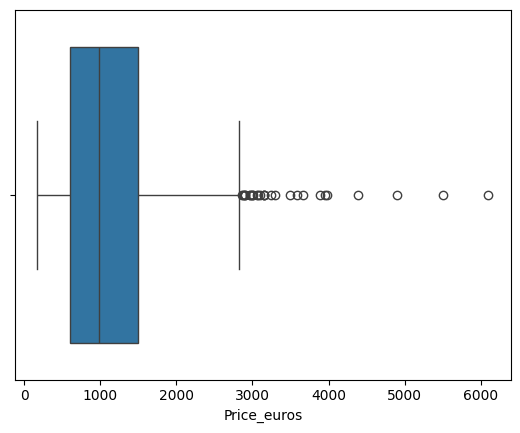

In [47]:
import seaborn as sns
sns.boxplot(data=data,x='Price_euros')

In [48]:
Q1 = data['Price_euros'].quantile(0.25)
Q3 = data['Price_euros'].quantile(0.75)
IQR = Q3 - Q1

In [49]:
Min_range = Q1 - 1.5*IQR
Max_range = Q3 + 1.5*IQR
data = data[data['Price_euros']<=Max_range] 
data.shape

(1272, 15)

In [52]:
X = data.drop(columns=['laptop_ID','Price_euros','Weight'])
y = data['Price_euros']


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
rf_model = RandomForestRegressor(n_estimators=100,criterion='absolute_error',max_depth=16)
rf_model.fit(X_train,Y_train)

Y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 162.63
mean_squared_error : 59683.60
r2_score : 0.84


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      1272 non-null   int64  
 1   Company        1272 non-null   int32  
 2   TypeName       1272 non-null   int32  
 3   Inches         1272 non-null   float64
 4   Ram            1272 non-null   int64  
 5   Memory         1272 non-null   int32  
 6   Gpu            1272 non-null   int32  
 7   OpSys          1272 non-null   int32  
 8   Weight         1272 non-null   float64
 9   Price_euros    1272 non-null   float64
 10  Touchscreen    1272 non-null   int64  
 11  Screen Height  1272 non-null   int32  
 12  Screen width   1272 non-null   int32  
 13  Cpu Brand      1272 non-null   int32  
 14  Cpu HZ         1272 non-null   float64
dtypes: float64(4), int32(8), int64(3)
memory usage: 119.2 KB


In [57]:
data.head()

,laptop_ID,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Screen Height,Screen width,Cpu Brand,Cpu HZ
0,1,1,3,13.3,8,128,1,5,1.37,1339.69,0,2560,1600,1,2.3
1,2,1,3,13.3,8,128,1,5,1.34,898.94,0,1440,900,1,1.8
2,3,7,2,15.6,8,256,1,2,1.86,575.00,0,1920,1080,1,2.5
3,4,1,3,15.4,16,512,0,5,1.83,2537.45,0,2880,1800,1,2.7
4,5,1,3,13.3,8,256,1,5,1.37,1803.60,0,2560,1600,1,3.1


In [55]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']